In [13]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (50,60)

In [14]:
import requests
import pandas as pd

# Function to get weather data
def get_weather_data(api_key, city):
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"
    response = requests.get(url)
    return response.json()

# Load your house price data
house_data = pd.read_csv('house_prediction.csv') 

# Add weather data to house data
weather_data = []

for index, row in house_data.iterrows():
    city = row['city']  
    weather = get_weather_data('c17237724eb6b66e008bff3b486d67c8', city)  
    if weather.get('main'):
        weather_info = {
            'city': city,
            'Temperature': weather['main']['temp'],
            'Humidity': weather['main']['humidity'],
            'Weather': weather['weather'][0]['description']
        }
        weather_data.append(weather_info)

# Convert weather data to DataFrame
weather_df = pd.DataFrame(weather_data)

# Merge with house data
merged_data = pd.merge(house_data, weather_df, on='city', how='left')

# Save to CSV
merged_data.to_csv('merged_house_weather_data.csv', index=False)

In [15]:
merged_data =pd.read_csv("merged_house_weather_data.csv")
merged_data.head(1000)


,url,beds,city,date,size,type,baths,price,neighborhood,property_id,Temperature,Humidity,Weather
0,https://www.99acres.com/residential-land-plot-...,0,bangalore,2025-02-19,799-1258 sqft,residential land / plot,0,2317000.0,jigani,NaN,23.20,73,overcast clouds
1,https://www.99acres.com/residential-land-plot-...,0,bangalore,2025-02-19,799-1258 sqft,residential land / plot,0,2317000.0,jigani,NaN,23.20,73,overcast clouds
2,https://www.99acres.com/residential-land-plot-...,0,bangalore,2025-02-19,799-1258 sqft,residential land / plot,0,2317000.0,jigani,NaN,23.20,73,overcast clouds
3,https://www.99acres.com/residential-land-plot-...,0,bangalore,2025-02-19,799-1258 sqft,residential land / plot,0,2317000.0,jigani,NaN,23.20,73,overcast clouds
4,https://www.99acres.com/residential-land-plot-...,0,bangalore,2025-02-19,799-1258 sqft,residential land / plot,0,2317000.0,jigani,NaN,23.20,73,overcast clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://www.99acres.com/rs-aurora-bay-bheemili...,3,visakhapatnam,2025-02-19t04:38:36.102z,3503 - 6226 sqft,"3, 4, 5, 6 bhk villa",3,29800000.0,bheemili,NaN,27.89,72,overcast clouds
996,https://www.99acres.com/rs-aurora-bay-bheemili...,3,visakhapatnam,2025-02-19t04:38:36.102z,3503 - 6226 sqft,"3, 4, 5, 6 bhk villa",3,29800000.0,bheemili,NaN,27.89,72,overcast clouds
997,https://www.99acres.com/rs-aurora-bay-bheemili...,3,visakhapatnam,2025-02-19t04:38:36.102z,3503 - 6226 sqft,"3, 4, 5, 6 bhk villa",3,29800000.0,bheemili,NaN,27.89,72,overcast clouds
998,https://www.99acres.com/rs-aurora-bay-bheemili...,3,visakhapatnam,2025-02-19t04:38:36.102z,3503 - 6226 sqft,"3, 4, 5, 6 bhk villa",3,29800000.0,bheemili,NaN,27.89,72,overcast clouds


In [16]:
merged_data = merged_data.assign(property_id=merged_data['property_id'].fillna('Unknown'))
print(merged_data.duplicated().sum())
merged_data['city'] = merged_data['city'].str.strip().str.lower()
print(merged_data.describe())
print(merged_data.dtypes)


merged_data.head(1000)


4654
              beds        baths         price  Temperature     Humidity
count  4941.000000  4941.000000  4.941000e+03  4941.000000  4941.000000
mean      2.360049     1.884639  1.903220e+07    28.825386    68.472981
std       1.916394     1.977210  3.764127e+07     2.215792    10.373819
min       0.000000     0.000000  0.000000e+00    23.200000    48.000000
25%       1.000000     0.000000  5.065000e+06    27.450000    59.000000
50%       2.000000     2.000000  1.050000e+07    28.060000    63.000000
75%       3.000000     3.000000  2.350000e+07    30.620000    80.000000
max      12.000000    12.000000  6.000000e+08    34.490000    89.000000
url              object
beds              int64
city             object
date             object
size             object
type             object
baths             int64
price           float64
neighborhood     object
property_id      object
Temperature     float64
Humidity          int64
Weather          object
dtype: object


,url,beds,city,date,size,type,baths,price,neighborhood,property_id,Temperature,Humidity,Weather
0,https://www.99acres.com/residential-land-plot-...,0,bangalore,2025-02-19,799-1258 sqft,residential land / plot,0,2317000.0,jigani,Unknown,23.20,73,overcast clouds
1,https://www.99acres.com/residential-land-plot-...,0,bangalore,2025-02-19,799-1258 sqft,residential land / plot,0,2317000.0,jigani,Unknown,23.20,73,overcast clouds
2,https://www.99acres.com/residential-land-plot-...,0,bangalore,2025-02-19,799-1258 sqft,residential land / plot,0,2317000.0,jigani,Unknown,23.20,73,overcast clouds
3,https://www.99acres.com/residential-land-plot-...,0,bangalore,2025-02-19,799-1258 sqft,residential land / plot,0,2317000.0,jigani,Unknown,23.20,73,overcast clouds
4,https://www.99acres.com/residential-land-plot-...,0,bangalore,2025-02-19,799-1258 sqft,residential land / plot,0,2317000.0,jigani,Unknown,23.20,73,overcast clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://www.99acres.com/rs-aurora-bay-bheemili...,3,visakhapatnam,2025-02-19t04:38:36.102z,3503 - 6226 sqft,"3, 4, 5, 6 bhk villa",3,29800000.0,bheemili,Unknown,27.89,72,overcast clouds
996,https://www.99acres.com/rs-aurora-bay-bheemili...,3,visakhapatnam,2025-02-19t04:38:36.102z,3503 - 6226 sqft,"3, 4, 5, 6 bhk villa",3,29800000.0,bheemili,Unknown,27.89,72,overcast clouds
997,https://www.99acres.com/rs-aurora-bay-bheemili...,3,visakhapatnam,2025-02-19t04:38:36.102z,3503 - 6226 sqft,"3, 4, 5, 6 bhk villa",3,29800000.0,bheemili,Unknown,27.89,72,overcast clouds
998,https://www.99acres.com/rs-aurora-bay-bheemili...,3,visakhapatnam,2025-02-19t04:38:36.102z,3503 - 6226 sqft,"3, 4, 5, 6 bhk villa",3,29800000.0,bheemili,Unknown,27.89,72,overcast clouds


print(merged_data[merged_data['price'] > 1e8])
merged_data['date'].fillna(pd.to_datetime('2025-02-19'), inplace=True)
print(merged_data[(merged_data['Temperature'] < 10) | (merged_data['Temperature'] > 50)])
print(merged_data[(merged_data['Humidity'] < 0) | (merged_data['Humidity'] > 100)])



In [17]:
print(merged_data[merged_data['price'] > 1e8])
merged_data['date'].fillna(pd.to_datetime('2025-02-19'), inplace=True)
print(merged_data[(merged_data['Temperature'] < 10) | (merged_data['Temperature'] > 50)])
print(merged_data[(merged_data['Humidity'] < 0) | (merged_data['Humidity'] > 100)])



                                                    url  beds     city  \
100   https://www.99acres.com/4-bhk-bedroom-apartmen...     4  gurgaon   
101   https://www.99acres.com/4-bhk-bedroom-apartmen...     4  gurgaon   
102   https://www.99acres.com/4-bhk-bedroom-apartmen...     4  gurgaon   
103   https://www.99acres.com/4-bhk-bedroom-apartmen...     4  gurgaon   
104   https://www.99acres.com/4-bhk-bedroom-apartmen...     4  gurgaon   
105   https://www.99acres.com/4-bhk-bedroom-apartmen...     4  gurgaon   
106   https://www.99acres.com/4-bhk-bedroom-apartmen...     4  gurgaon   
107   https://www.99acres.com/4-bhk-bedroom-apartmen...     4  gurgaon   
108   https://www.99acres.com/4-bhk-bedroom-apartmen...     4  gurgaon   
109   https://www.99acres.com/4-bhk-bedroom-apartmen...     4  gurgaon   
120   https://www.99acres.com/residential-land-plot-...     0  gurgaon   
121   https://www.99acres.com/residential-land-plot-...     0  gurgaon   
122   https://www.99acres.com/resident

C:\Users\Ritika Bobhate\AppData\Local\Temp\ipykernel_3876\810862219.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['date'].fillna(pd.to_datetime('2025-02-19'), inplace=True)


In [18]:
merged_data.loc[merged_data['date'].isna(), 'date'] = pd.to_datetime('2025-02-19')
merged_data.head(1000)

,url,beds,city,date,size,type,baths,price,neighborhood,property_id,Temperature,Humidity,Weather
0,https://www.99acres.com/residential-land-plot-...,0,bangalore,2025-02-19,799-1258 sqft,residential land / plot,0,2317000.0,jigani,Unknown,23.20,73,overcast clouds
1,https://www.99acres.com/residential-land-plot-...,0,bangalore,2025-02-19,799-1258 sqft,residential land / plot,0,2317000.0,jigani,Unknown,23.20,73,overcast clouds
2,https://www.99acres.com/residential-land-plot-...,0,bangalore,2025-02-19,799-1258 sqft,residential land / plot,0,2317000.0,jigani,Unknown,23.20,73,overcast clouds
3,https://www.99acres.com/residential-land-plot-...,0,bangalore,2025-02-19,799-1258 sqft,residential land / plot,0,2317000.0,jigani,Unknown,23.20,73,overcast clouds
4,https://www.99acres.com/residential-land-plot-...,0,bangalore,2025-02-19,799-1258 sqft,residential land / plot,0,2317000.0,jigani,Unknown,23.20,73,overcast clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://www.99acres.com/rs-aurora-bay-bheemili...,3,visakhapatnam,2025-02-19t04:38:36.102z,3503 - 6226 sqft,"3, 4, 5, 6 bhk villa",3,29800000.0,bheemili,Unknown,27.89,72,overcast clouds
996,https://www.99acres.com/rs-aurora-bay-bheemili...,3,visakhapatnam,2025-02-19t04:38:36.102z,3503 - 6226 sqft,"3, 4, 5, 6 bhk villa",3,29800000.0,bheemili,Unknown,27.89,72,overcast clouds
997,https://www.99acres.com/rs-aurora-bay-bheemili...,3,visakhapatnam,2025-02-19t04:38:36.102z,3503 - 6226 sqft,"3, 4, 5, 6 bhk villa",3,29800000.0,bheemili,Unknown,27.89,72,overcast clouds
998,https://www.99acres.com/rs-aurora-bay-bheemili...,3,visakhapatnam,2025-02-19t04:38:36.102z,3503 - 6226 sqft,"3, 4, 5, 6 bhk villa",3,29800000.0,bheemili,Unknown,27.89,72,overcast clouds


In [19]:
# size format

import re

def extract_size(size):
    # Handle cases where size might be missing or invalid
    if pd.isnull(size) or not isinstance(size, str):
        return None
    
    # Extract numbers using regex
    numbers = re.findall(r'\d+', size)
    
    # Calculate the average if it's a range or return single value
    if len(numbers) == 1:
        return int(numbers[0])
    elif len(numbers) > 1:
        return (int(numbers[0]) + int(numbers[-1])) / 2
    else:
        return None

# Apply the function
merged_data['size_sqft'] = merged_data['size'].apply(extract_size)
merged_data.head(1000)



,url,beds,city,date,size,type,baths,price,neighborhood,property_id,Temperature,Humidity,Weather,size_sqft
0,https://www.99acres.com/residential-land-plot-...,0,bangalore,2025-02-19,799-1258 sqft,residential land / plot,0,2317000.0,jigani,Unknown,23.20,73,overcast clouds,1028.5
1,https://www.99acres.com/residential-land-plot-...,0,bangalore,2025-02-19,799-1258 sqft,residential land / plot,0,2317000.0,jigani,Unknown,23.20,73,overcast clouds,1028.5
2,https://www.99acres.com/residential-land-plot-...,0,bangalore,2025-02-19,799-1258 sqft,residential land / plot,0,2317000.0,jigani,Unknown,23.20,73,overcast clouds,1028.5
3,https://www.99acres.com/residential-land-plot-...,0,bangalore,2025-02-19,799-1258 sqft,residential land / plot,0,2317000.0,jigani,Unknown,23.20,73,overcast clouds,1028.5
4,https://www.99acres.com/residential-land-plot-...,0,bangalore,2025-02-19,799-1258 sqft,residential land / plot,0,2317000.0,jigani,Unknown,23.20,73,overcast clouds,1028.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://www.99acres.com/rs-aurora-bay-bheemili...,3,visakhapatnam,2025-02-19t04:38:36.102z,3503 - 6226 sqft,"3, 4, 5, 6 bhk villa",3,29800000.0,bheemili,Unknown,27.89,72,overcast clouds,4864.5
996,https://www.99acres.com/rs-aurora-bay-bheemili...,3,visakhapatnam,2025-02-19t04:38:36.102z,3503 - 6226 sqft,"3, 4, 5, 6 bhk villa",3,29800000.0,bheemili,Unknown,27.89,72,overcast clouds,4864.5
997,https://www.99acres.com/rs-aurora-bay-bheemili...,3,visakhapatnam,2025-02-19t04:38:36.102z,3503 - 6226 sqft,"3, 4, 5, 6 bhk villa",3,29800000.0,bheemili,Unknown,27.89,72,overcast clouds,4864.5
998,https://www.99acres.com/rs-aurora-bay-bheemili...,3,visakhapatnam,2025-02-19t04:38:36.102z,3503 - 6226 sqft,"3, 4, 5, 6 bhk villa",3,29800000.0,bheemili,Unknown,27.89,72,overcast clouds,4864.5


In [20]:
merged_data[['size', 'size_sqft']].sample(10)


,size,size_sqft
4361,1350 sqft,1350.0
1271,1530 sqft,1530.0
3189,2400 sqft,2400.0
2609,891-1530 sqft,1210.5
13,1085 sqft,1085.0
3274,11997 sqft,11997.0
1744,1350 sqft,1350.0
276,165 sqft,165.0
1551,varies,NaN
3074,varies,NaN


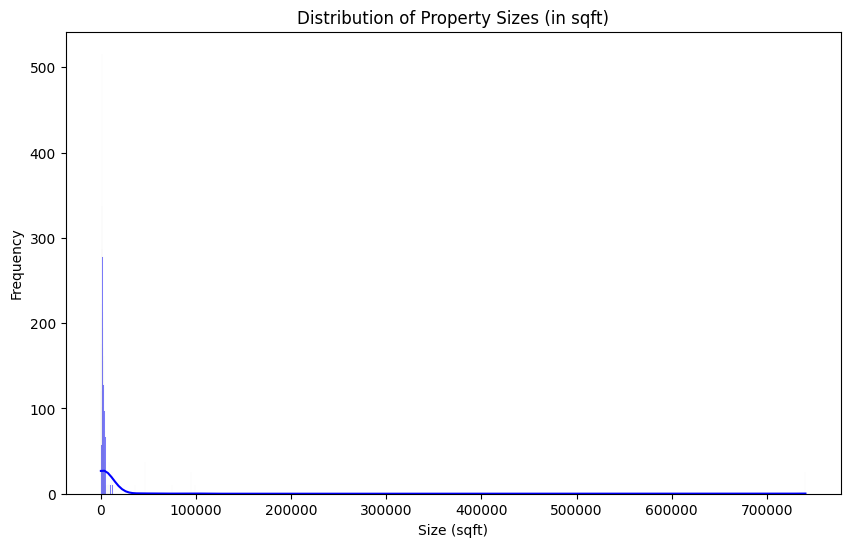

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(merged_data['size_sqft'], kde=True, color='blue')
plt.title('Distribution of Property Sizes (in sqft)')
plt.xlabel('Size (sqft)')
plt.ylabel('Frequency')
plt.show()



In [22]:
merged_data[merged_data.Humidity>60]

,url,beds,city,date,size,type,baths,price,neighborhood,property_id,Temperature,Humidity,Weather,size_sqft
0,https://www.99acres.com/residential-land-plot-...,0,bangalore,2025-02-19,799-1258 sqft,residential land / plot,0,2317000.0,jigani,Unknown,23.20,73,overcast clouds,1028.5
1,https://www.99acres.com/residential-land-plot-...,0,bangalore,2025-02-19,799-1258 sqft,residential land / plot,0,2317000.0,jigani,Unknown,23.20,73,overcast clouds,1028.5
2,https://www.99acres.com/residential-land-plot-...,0,bangalore,2025-02-19,799-1258 sqft,residential land / plot,0,2317000.0,jigani,Unknown,23.20,73,overcast clouds,1028.5
3,https://www.99acres.com/residential-land-plot-...,0,bangalore,2025-02-19,799-1258 sqft,residential land / plot,0,2317000.0,jigani,Unknown,23.20,73,overcast clouds,1028.5
4,https://www.99acres.com/residential-land-plot-...,0,bangalore,2025-02-19,799-1258 sqft,residential land / plot,0,2317000.0,jigani,Unknown,23.20,73,overcast clouds,1028.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4936,https://www.99acres.com/3-bhk-bedroom-apartmen...,3,pune,2025-02-12,878 sqft,residential apartment,3,12000000.0,mahalunge,Unknown,23.95,86,broken clouds,878.0
4937,https://www.99acres.com/3-bhk-bedroom-apartmen...,3,pune,2025-02-12,878 sqft,residential apartment,3,12000000.0,mahalunge,Unknown,23.95,86,broken clouds,878.0
4938,https://www.99acres.com/3-bhk-bedroom-apartmen...,3,pune,2025-02-12,878 sqft,residential apartment,3,12000000.0,mahalunge,Unknown,23.95,86,broken clouds,878.0
4939,https://www.99acres.com/3-bhk-bedroom-apartmen...,3,pune,2025-02-12,878 sqft,residential apartment,3,12000000.0,mahalunge,Unknown,23.95,86,broken clouds,878.0


In [23]:
import pandas as pd
from datetime import datetime

def standardize_date(val):
    if isinstance(val, str) and "mo ago" in val:
        months = int(val.split("mo")[0])
        return (datetime.today() - pd.DateOffset(months=months)).date()
    try:
        return pd.to_datetime(val).date()
    except:
        return None

# Clean the size column and convert to float
merged_data['size'] = merged_data['size'].astype(str).str.extract('(\d+\.?\d*)')[0].astype(float)

# Calculate price per sqft
merged_data['price_per_sqft'] = merged_data['price'] / merged_data['size']

# Temperature binning
merged_data['temp_category'] = pd.cut(merged_data['Temperature'], bins=[0, 20, 30, 40], labels=['cold', 'moderate', 'hot'])

# Export to Excel
merged_data.to_excel("cleaned_property_data.xlsx", index=False)
print("Cleaned data saved to cleaned_property_data.xlsx")





<>:14: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Ritika Bobhate\AppData\Local\Temp\ipykernel_3876\2069595610.py:14: SyntaxWarning: invalid escape sequence '\d'
  merged_data['size'] = merged_data['size'].astype(str).str.extract('(\d+\.?\d*)')[0].astype(float)


Cleaned data saved to cleaned_property_data.xlsx


In [24]:
import pandas as pd
from datetime import datetime
from pandas.tseries.offsets import DateOffset

# Load your data
merged_data = pd.read_excel("cleaned_property_data.xlsx")

# 1. Drop unnecessary columns
merged_data.drop(['url', 'property_id'], axis=1, inplace=True)

# 2. Fix the 'date' column
def standardize_date(val):
    try:
        if isinstance(val, str) and "mo ago" in val:
            months = int(val.split("mo")[0])
            return (datetime.today() - DateOffset(months=months)).date()
        return pd.to_datetime(val, errors='coerce').date()
    except:
        return None

merged_data['date'] = merged_data['date'].apply(standardize_date)

# 3. Remove outliers using IQR method
def remove_outliers_iqr(data, column):
    Q1 = merged_data[column].quantile(0.25)
    Q3 = merged_data[column].quantile(0.75)
    IQR = Q3 - Q1
    return merged_data[(merged_data[column] >= Q1 - 1.5 * IQR) & 
                       (merged_data[column] <= Q3 + 1.5 * IQR)]

for col in ['price', 'size', 'price_per_sqft']:
    merged_data = remove_outliers_iqr(merged_data, col)

# Save cleaned file
merged_data.to_excel("fully_cleaned_property_data.xlsx", index=False)
print("✅ Done! Saved as 'sucessfully_cleaned_property_data.xlsx'")




✅ Done! Saved as 'sucessfully_cleaned_property_data.xlsx'


In [25]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time

# Setup geolocator
geolocator = Nominatim(user_agent="property_data_cleaner")

# Retry-safe geocoding
def get_lat_lon_osm(location):
    try:
        full_loc = f"{location}, Bangalore, India"
        loc = geolocator.geocode(full_loc, timeout=10)
        if loc:
            return pd.Series([loc.latitude, loc.longitude])
    except GeocoderTimedOut:
        print(f"Timeout: Retrying for {location}")
        time.sleep(1)
        return get_lat_lon_osm(location)
    except Exception as e:
        print(f"Error for location '{location}': {e}")
    return pd.Series([None, None])

# Clean location
merged_data['clean_location'] = merged_data['neighborhood'].astype(str).str.lower().str.strip()

# Unique locations
unique_locs = merged_data[['clean_location']].drop_duplicates().copy()

# Apply geocoding with delay (to avoid overload)
unique_locs[['latitude', 'longitude']] = unique_locs['clean_location'].apply(
    lambda loc: get_lat_lon_osm(loc)
)

# Merge into original DataFrame
merged_data = merged_data.merge(unique_locs, on='clean_location', how='left')

# Save
merged_data.to_excel("geo_enriched_property_data_osm.xlsx", index=False)

print("Saved using free geopy (OpenStreetMap) ✅")


Saved using free geopy (OpenStreetMap) ✅


In [26]:
merged_data.head(10)

,beds,city,date,size,type,baths,price,neighborhood,Temperature,Humidity,Weather,size_sqft,price_per_sqft,temp_category,clean_location,latitude,longitude
0,0,bangalore,2025-02-19,799.0,residential land / plot,0,2317000.0,jigani,23.2,73,overcast clouds,1028.5,2899.874844,moderate,jigani,12.780786,77.641024
1,0,bangalore,2025-02-19,799.0,residential land / plot,0,2317000.0,jigani,23.2,73,overcast clouds,1028.5,2899.874844,moderate,jigani,12.780786,77.641024
2,0,bangalore,2025-02-19,799.0,residential land / plot,0,2317000.0,jigani,23.2,73,overcast clouds,1028.5,2899.874844,moderate,jigani,12.780786,77.641024
3,0,bangalore,2025-02-19,799.0,residential land / plot,0,2317000.0,jigani,23.2,73,overcast clouds,1028.5,2899.874844,moderate,jigani,12.780786,77.641024
4,0,bangalore,2025-02-19,799.0,residential land / plot,0,2317000.0,jigani,23.2,73,overcast clouds,1028.5,2899.874844,moderate,jigani,12.780786,77.641024
5,0,bangalore,2025-02-19,799.0,residential land / plot,0,2317000.0,jigani,23.2,73,overcast clouds,1028.5,2899.874844,moderate,jigani,12.780786,77.641024
6,0,bangalore,2025-02-19,799.0,residential land / plot,0,2317000.0,jigani,23.2,73,overcast clouds,1028.5,2899.874844,moderate,jigani,12.780786,77.641024
7,0,bangalore,2025-02-19,799.0,residential land / plot,0,2317000.0,jigani,23.2,73,overcast clouds,1028.5,2899.874844,moderate,jigani,12.780786,77.641024
8,0,bangalore,2025-02-19,799.0,residential land / plot,0,2317000.0,jigani,23.2,73,overcast clouds,1028.5,2899.874844,moderate,jigani,12.780786,77.641024
9,0,bangalore,2025-02-19,799.0,residential land / plot,0,2317000.0,jigani,23.2,73,overcast clouds,1028.5,2899.874844,moderate,jigani,12.780786,77.641024


In [27]:
merged_data['sqft_per_bed'] = merged_data['size_sqft'] / merged_data['beds'].replace(0, pd.NA)
merged_data[merged_data['sqft_per_bed'] < 10]
merged_data.head(10)


,beds,city,date,size,type,baths,price,neighborhood,Temperature,Humidity,Weather,size_sqft,price_per_sqft,temp_category,clean_location,latitude,longitude,sqft_per_bed
0,0,bangalore,2025-02-19,799.0,residential land / plot,0,2317000.0,jigani,23.2,73,overcast clouds,1028.5,2899.874844,moderate,jigani,12.780786,77.641024,<NA>
1,0,bangalore,2025-02-19,799.0,residential land / plot,0,2317000.0,jigani,23.2,73,overcast clouds,1028.5,2899.874844,moderate,jigani,12.780786,77.641024,<NA>
2,0,bangalore,2025-02-19,799.0,residential land / plot,0,2317000.0,jigani,23.2,73,overcast clouds,1028.5,2899.874844,moderate,jigani,12.780786,77.641024,<NA>
3,0,bangalore,2025-02-19,799.0,residential land / plot,0,2317000.0,jigani,23.2,73,overcast clouds,1028.5,2899.874844,moderate,jigani,12.780786,77.641024,<NA>
4,0,bangalore,2025-02-19,799.0,residential land / plot,0,2317000.0,jigani,23.2,73,overcast clouds,1028.5,2899.874844,moderate,jigani,12.780786,77.641024,<NA>
5,0,bangalore,2025-02-19,799.0,residential land / plot,0,2317000.0,jigani,23.2,73,overcast clouds,1028.5,2899.874844,moderate,jigani,12.780786,77.641024,<NA>
6,0,bangalore,2025-02-19,799.0,residential land / plot,0,2317000.0,jigani,23.2,73,overcast clouds,1028.5,2899.874844,moderate,jigani,12.780786,77.641024,<NA>
7,0,bangalore,2025-02-19,799.0,residential land / plot,0,2317000.0,jigani,23.2,73,overcast clouds,1028.5,2899.874844,moderate,jigani,12.780786,77.641024,<NA>
8,0,bangalore,2025-02-19,799.0,residential land / plot,0,2317000.0,jigani,23.2,73,overcast clouds,1028.5,2899.874844,moderate,jigani,12.780786,77.641024,<NA>
9,0,bangalore,2025-02-19,799.0,residential land / plot,0,2317000.0,jigani,23.2,73,overcast clouds,1028.5,2899.874844,moderate,jigani,12.780786,77.641024,<NA>


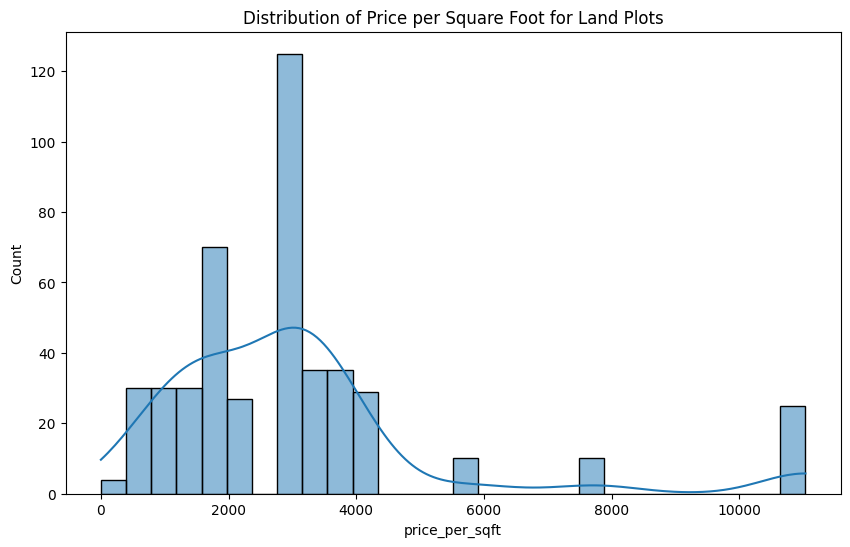

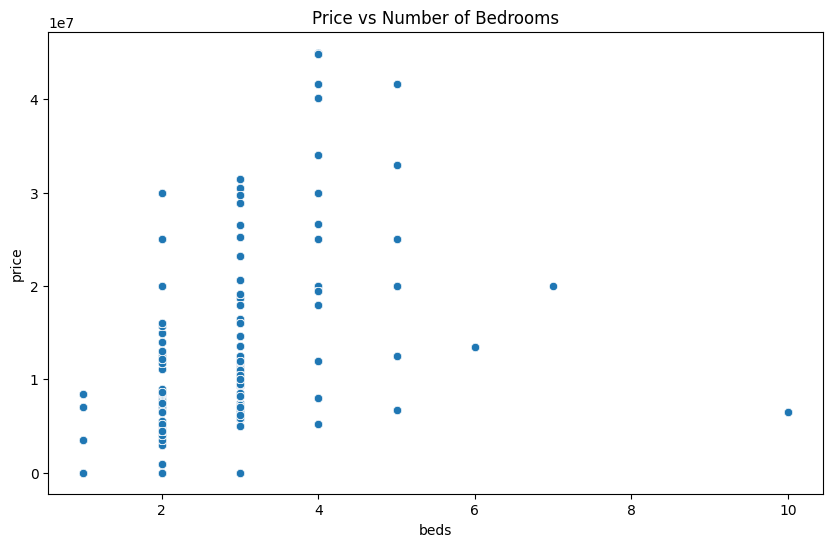

In [28]:
# Create explicit copies to avoid the SettingWithCopyWarning
residential = merged_data[merged_data['type'] != 'residential land / plot'].copy()
land_plots = merged_data[merged_data['type'] == 'residential land / plot'].copy()

# For residential properties with bedrooms, calculate sqft_per_bed
if len(residential[residential['beds'] > 0]) > 0:
    residential['sqft_per_bed'] = residential['size_sqft'] / residential['beds'].replace(0, pd.NA)
    
land_plots_analysis = land_plots.sort_values('price_per_sqft')
merged_data.head(10)
# If you have matplotlib and seaborn installed
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of price per sqft for land plots
plt.figure(figsize=(10, 6))
sns.histplot(land_plots['price_per_sqft'], kde=True)
plt.title('Distribution of Price per Square Foot for Land Plots')
plt.show()

# If you have residential properties with bedrooms
if len(residential[residential['beds'] > 0]) > 0:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='beds', y='price', data=residential[residential['beds'] > 0])
    plt.title('Price vs Number of Bedrooms')
    plt.show()



In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import re

def preprocess_data(df):
    # Clean and extract size_sqft
    def extract_size(size):
        if pd.isnull(size) or not isinstance(size, str):
            return None
        numbers = re.findall(r'\d+', size)
        if len(numbers) == 1:
            return int(numbers[0])
        elif len(numbers) > 1:
            return (int(numbers[0]) + int(numbers[-1])) / 2
        else:
            return None
    
    df['size_sqft'] = df['size'].apply(extract_size)
    
    # Calculate price per sqft
    df['price_per_sqft'] = df['price'] / df['size_sqft']
    
    # Create temperature categories
    def categorize_temp(temp):
        if temp < 15:
            return 'cold'
        elif 15 <= temp <= 30:
            return 'moderate'
        else:
            return 'hot'
    
    df['temp_category'] = df['Temperature'].apply(categorize_temp)
    
    # Handle missing values
    df['property_id'] = df['property_id'].fillna('Unknown')
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['date'] = df['date'].fillna(pd.to_datetime('2025-02-19'))
    
    # Feature engineering
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    
    return df

def prepare_features(df):
    # Select relevant features
    features = df[['beds', 'baths', 'size_sqft', 'city', 'type', 'Temperature', 
                   'Humidity', 'Weather', 'temp_category', 'price_per_sqft']]
    
    # Define numeric and categorical features
    numeric_features = ['beds', 'baths', 'size_sqft', 'Temperature', 'Humidity']
    categorical_features = ['city', 'type', 'Weather', 'temp_category']
    
    # Create transformers
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])
    
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])
    
    # Combine transformers
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])
    
    return preprocessor, features